<a href="https://colab.research.google.com/github/carlos24520/Numero-Secreto/blob/main/Copia_de_AluraStoreLatam).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Verifica los nombres de las columnas
print(tienda.columns)

# Ahora sumamos los precios
ingreso_tienda = tienda['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

# Mostramos los resultados
print(f"Ingreso Tienda : {ingreso_tienda}")
print(f"Ingreso Tienda 2: {ingreso_tienda2}")
print(f"Ingreso Tienda 3: {ingreso_tienda3}")
print(f"Ingreso Tienda 4: {ingreso_tienda4}")


Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Ingreso Tienda : 1150880400.0
Ingreso Tienda 2: 1116343500.0
Ingreso Tienda 3: 1098019600.0
Ingreso Tienda 4: 1038375700.0


#1. Análisis de facturación



In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def ingresosTiendas(nombres, suma_precios_tienda):
    plt.figure(figsize=(10, 5))
    colores = mpl.colormaps['Set3']
    colors = [colores(i) for i in range(len(nombres))]
    bars = plt.bar(nombres, suma_precios_tienda, color=colors)

    plt.xlabel("Tiendas")
    plt.ylabel("Ingresos Totales")
    plt.title("Ingresos")
    plt.xticks(rotation=45)

    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + height * 0.02,
            f'${int(height):,}',
            ha='center', va='bottom', fontsize=10
        )

    plt.tight_layout()
    plt.show()


# 2. Ventas por categoría

In [ ]:
def categorias_tiendas(tienda, nombre):
  categorias = {}
  for i in range(len(tienda)):
      categoria = tienda.loc[i, "Categoría del Producto"]

      if categoria in categorias:
          categorias[categoria] += 1
      else:
          categorias[categoria] = 1
  print(categorias)
  return graficos_tiendas(categorias, nombre)

In [ ]:
def graficos_tiendas(categorias,nombre):
  plt.figure(figsize=(10, 5))
  colores = mpl.colormaps['viridis']
  colors = [colores(i / len(nombres)) for i in range(len(nombres))]
  plt.bar(categorias.keys(), categorias.values(), color=colors)
  plt.xlabel("Categoría del Producto")
  plt.ylabel("Suma de Ventas")
  plt.title(f"Ventas por Categoría de {nombre}")
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

{'Electrónicos': 448, 'Muebles': 465, 'Juguetes': 324, 'Electrodomésticos': 312, 'Artículos para el hogar': 171, 'Deportes y diversión': 284, 'Libros': 173, 'Instrumentos musicales': 182}


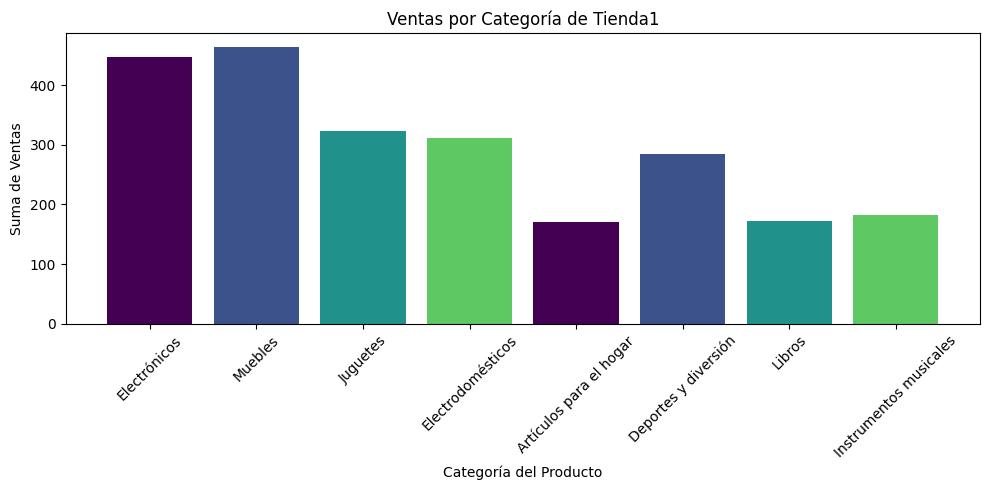

{'Muebles': 442, 'Instrumentos musicales': 224, 'Deportes y diversión': 275, 'Electrónicos': 422, 'Artículos para el hogar': 181, 'Juguetes': 313, 'Electrodomésticos': 305, 'Libros': 197}


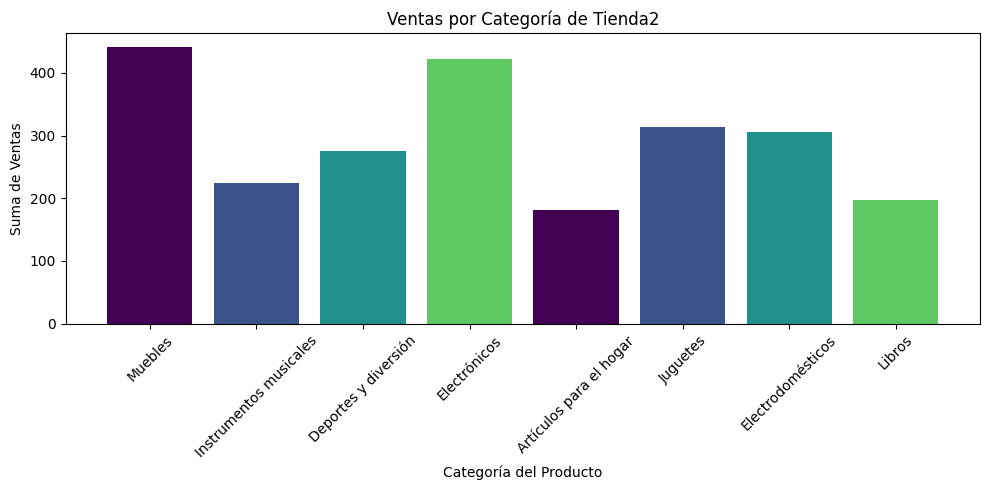

{'Electrodomésticos': 278, 'Muebles': 499, 'Instrumentos musicales': 177, 'Deportes y diversión': 277, 'Electrónicos': 451, 'Juguetes': 315, 'Artículos para el hogar': 177, 'Libros': 185}


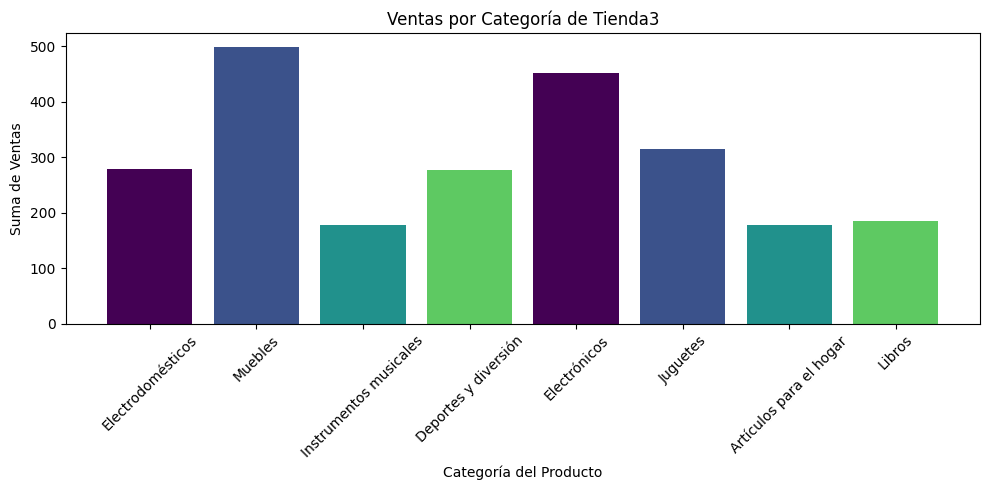

{'Electrodomésticos': 254, 'Muebles': 480, 'Deportes y diversión': 277, 'Libros': 187, 'Electrónicos': 451, 'Instrumentos musicales': 170, 'Juguetes': 338, 'Artículos para el hogar': 201}


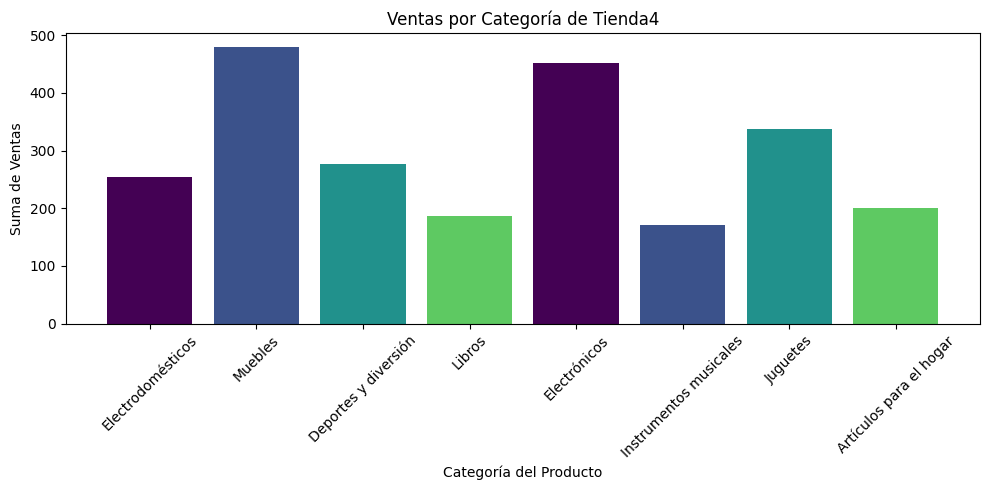

In [ ]:
lista_categorias = [categorias_tiendas(tienda, i) for tienda, i in zip(tiendas, nombres)]

# 3. Calificación promedio de la tienda


In [ ]:
def valoracion_promedio(tienda):
  promedio = round(tienda['Calificación'].sum()/len(tienda),2)
  return promedio

[np.float64(3.98), np.float64(4.04), np.float64(4.05), np.float64(4.0)]


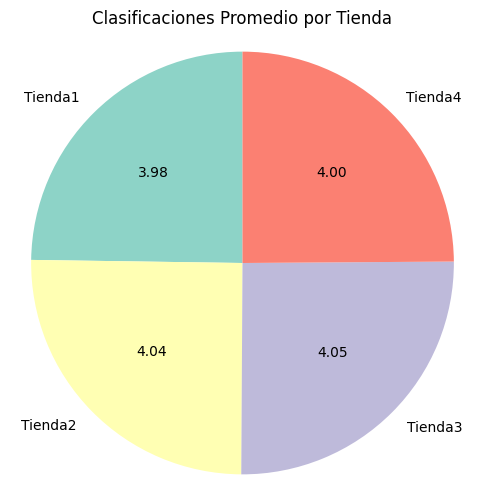

In [ ]:
valores = [valoracion_promedio(tienda) for tienda in tiendas]
print(valores)
def mostrar_valor(pct, valores):
    total = sum(valores)
    valor = pct * total / 100.0
    return f'{valor:.2f}'

plt.figure(figsize=(6, 6))
colores = mpl.colormaps['Set3']
colors = [colores(i) for i in range(len(nombres))]
plt.pie(valores, labels=nombres, autopct=lambda pct: mostrar_valor(pct, valores),
        startangle=90, colors=colors)
plt.title('Clasificaciones Promedio por Tienda')
plt.axis('equal')
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
import pandas as pd

# Leer los datos de cada tienda
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4])


productos_vendidos = tiendas.groupby('Producto')['Cantidad de cuotas'].sum().reset_index()


productos_vendidos_ordenados = productos_vendidos.sort_values(by='Cantidad de cuotas', ascending=False)


productos_vendidos_ordenados.head(), productos_vendidos_ordenados.tail()



(            Producto  Cantidad de cuotas
 40  Secadora de ropa                 649
 32     Mesa de noche                 627
 38         Pandereta                 625
 8          Bicicleta                 614
 25         Iphone 15                 611,
           Producto  Cantidad de cuotas
 30  Mesa de centro                 469
 19  Dinosaurio Rex                 458
 13    Celular ABXY                 447
 42    Set de vasos                 435
 46      Smartwatch                 432)

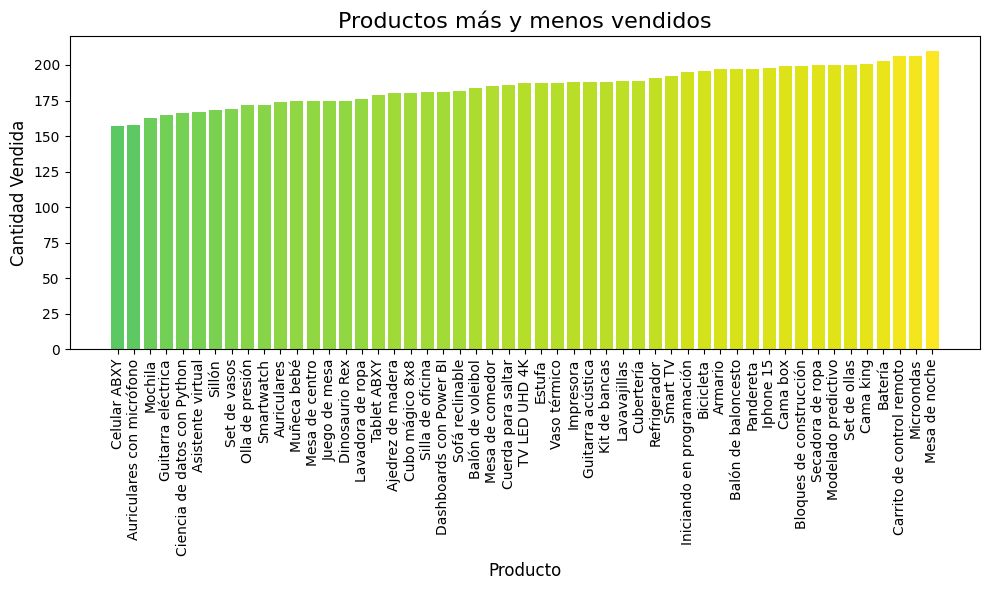

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos de las tiendas
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar los datos de cada tienda
tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Concatenar todos los datos en un solo DataFrame
tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4])

# Contar la cantidad de ventas por producto
ventas_producto = tiendas['Producto'].value_counts()

# Ordenar las ventas de menos a más
ventas_producto = ventas_producto.sort_values()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(ventas_producto / max(ventas_producto))  # Colores de menos a más vendidos
plt.bar(ventas_producto.index, ventas_producto.values, color=colors)

# Añadir títulos y etiquetas
plt.title('Productos más y menos vendidos', fontsize=16)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Cantidad Vendida', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

# 5. Envío promedio por tienda

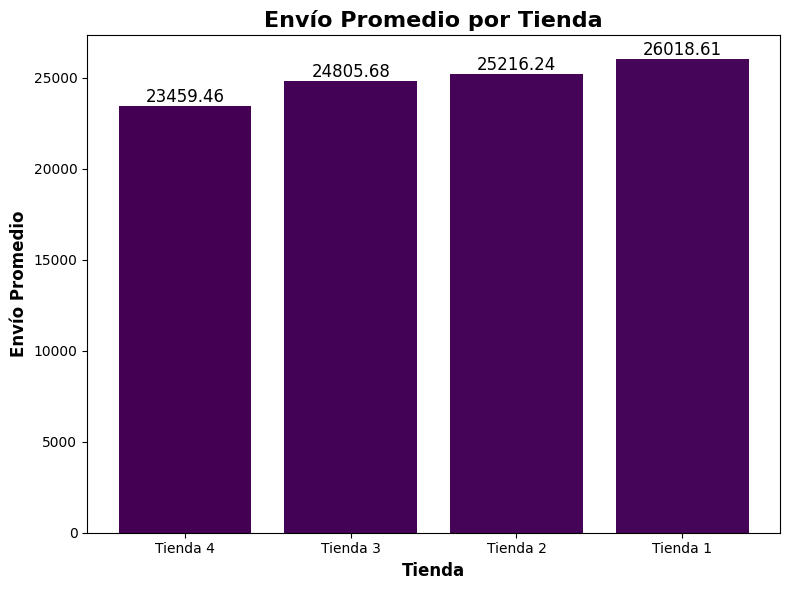

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos de cada tienda
tienda1 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv")
tienda2 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv")
tienda3 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv")
tienda4 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv")

# Calcular el costo de envío promedio de cada tienda
envio_promedio_tienda1 = tienda1['Costo de envío'].mean()
envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

# Crear los datos para la gráfica
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
envios = [envio_promedio_tienda1, envio_promedio_tienda2, envio_promedio_tienda3, envio_promedio_tienda4]

# Ordenar los envíos de menor a mayor
sorted_envios = sorted(zip(envios, tiendas))
envios_sorted, tiendas_sorted = zip(*sorted_envios)

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(tiendas_sorted, envios_sorted, color=plt.cm.viridis(range(len(tiendas_sorted))))

# Añadir títulos y etiquetas
plt.title('Envío Promedio por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda', fontsize=12, fontweight='bold')
plt.ylabel('Envío Promedio', fontsize=12, fontweight='bold')

# Añadir los valores sobre las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


Desarrollo del Análisis
1. Ingresos Totales
Se calculó el ingreso total de cada tienda mediante la suma de los precios de los productos vendidos:

Tienda 1: $1.150.880.400

Tienda 2: $1.116.343.500

Tienda 3: $1.098.019.600

Tienda 4: $1.038.375.700

Observacion: Tienda 1 lidera en ingresos en comparacion con las otras tiendas. Sin embargo, el ingreso por sí solo no garantiza sostenibilidad si no se acompaña de buena atención y logística.

2. Categorías de Productos Más y Menos Vendidas
Se revisaron las cantidades de productos vendidos por categoría en cada tienda. A continuación, el resumen:

Tienda 1

Muebles: 465

Electrónicos: 448

Juguetes: 324

Deportes y diversión: 284

Electrodomésticos: 312

Instrumentos musicales: 182

Libros: 173

Artículos para el hogar: 171

Tienda 2

Muebles: 442

Electrónicos: 422

Juguetes: 313

Deportes y diversión: 275

Electrodomésticos: 305

Instrumentos musicales: 224

Libros: 197

Artículos para el hogar: 181

Tienda 3

Muebles: 499

Electrónicos: 451

Juguetes: 315

Deportes y diversión: 277

Electrodomésticos: 278

Instrumentos musicales: 177

Libros: 185

Artículos para el hogar: 177

Tienda 4

Muebles: 480

Electrónicos: 451

Juguetes: 338

Deportes y diversión: 277

Electrodomésticos: 254

Instrumentos musicales: 170

Libros: 187

Artículos para el hogar: 201

Todas las tiendas venden principalmente Muebles y Electrónicos, pero Tienda 2 muestra una distribución más uniforme y equilibrada. Tiene buen rendimiento también en categorías como Instrumentos musicales y Libros. En contraste, Tienda 4, aunque tiene buenos números en Muebles y Juguetes, presenta menor rendimiento en otras categorías clave.

3. Calificaciones Promedio de los Clientes
El nivel de satisfacción del cliente fue analizado a partir de la calificación promedio:

Tienda 1: 3.98

Tienda 2: 4.04

Tienda 3: 4.05

Tienda 4: 4.0

Como se puede apreiar, si bien la tienda 1 fue la que mayores ingresos genero, fue la que obtuvo la menor clasificacion en las valoraciones de los clientes, seguida de la tienda 4, que fue la que genero menos ingresos.

En base a lo que tenemos por el momento, la tienda a eliminar estaria entre la Tienda 1 y Tienda 4

4. Productos Más y Menos Vendidos
Tienda 1
Celular ABXY = 33
Microondas = 60
Tienda 2
Juegos de Mesa = 32
Iniciando En Programacion = 65
Tienda 3
Bloques de Construccion = 35
Kit de Bancas = 57
Tienda 4
Guitarra Electrica = 33
Cama Box = 62
De estos datos no se puede obtener informacion significativa para dedicir o ir descartando que tienda debe ser o no eliminada.

5. Coste Promedio de Envío
Este es un factor importante para la rentabilidad y satisfacción del cliente:

Tienda 1: $26019

Tienda 2: $25216

Tienda 3: $24806

Tienda 4: $23459

Aunque Tienda 4 tiene el coste de envío más bajo, también es la segunda con menor calificación y la primera con ingresos más bajos. Mientras que tienda 1 es la que genera mas ingresos, pero la que tambien tiene un costo promedio de envio mas alto.

Diferencia % entre Tiendas 1 y 4
image.png

La Tienda 4 tiene un valor promedio de envío aproximadamente 9.83% menor que la Tienda 1.

image.png

La Tienda 4 generó aproximadamente 9.78% menos ingresos que la Tienda 1.

Recopilando
Tienda 1: Aunque tiene los ingresos más altos, sus calificaciones son las peores y su coste de envío es el más elevado. Esto indica posibles problemas logísticos o de servicio al cliente que podrían afectar la sostenibilidad a largo plazo.

Tienda 2: Presenta buena distribución de ventas por categorías, buenas calificaciones y un coste de envío aceptable. No es líder en nada, pero es sólida y equilibrada en todo.

Tienda 3: Tiene la mejor calificación, ingresos aceptables, y coste de envío moderado.

Tienda 4: Tiene los peores ingresos, segunda peor calificación y aunque el coste de envío es el mejor, su desempeño general es más débil, especialmente en ventas por categoría.

Recomendacion
Lo mejor para Sr Juan seria eliminar la Tienda 4, ya que es la menos rentable en general. Su único punto fuerte es el bajo coste de envío, pero no compensa sus bajos ingresos, calificación mediocre y pobre desempeño en categorías clave. Además, si se mejora la logística en otra tienda (como en tienda 1), se puede compensar ese coste de envío más bajo.

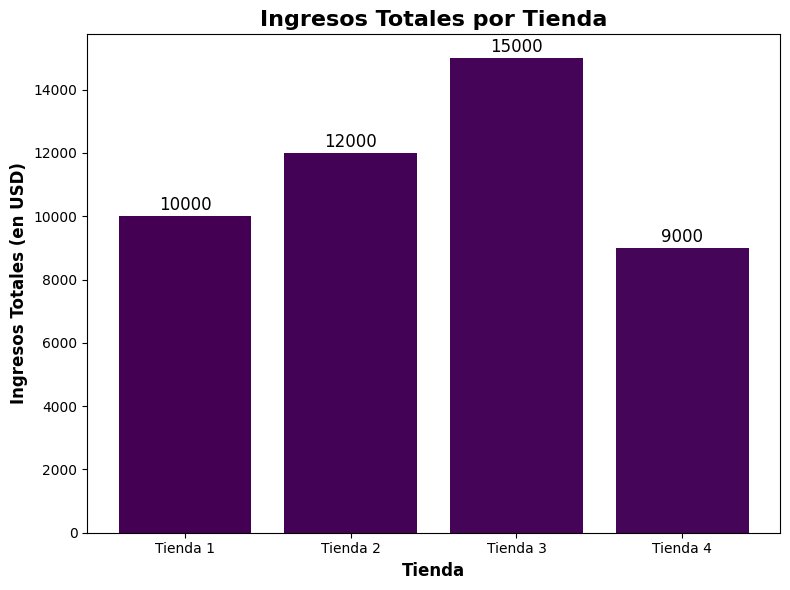

In [ ]:
import matplotlib.pyplot as plt

# Ingresos (valores hipotéticos)
ingresos_tienda1 = 10000
ingresos_tienda2 = 12000
ingresos_tienda3 = 15000
ingresos_tienda4 = 9000

# Tiendas y sus ingresos
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ingresos_tienda1, ingresos_tienda2, ingresos_tienda3, ingresos_tienda4]

# Crear gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(tiendas, ingresos, color=plt.cm.viridis(range(len(tiendas))))

# Añadir títulos y etiquetas
plt.title('Ingresos Totales por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda', fontsize=12, fontweight='bold')
plt.ylabel('Ingresos Totales (en USD)', fontsize=12, fontweight='bold')

# Mostrar los valores sobre las barras
for i, v in enumerate(ingresos):
    plt.text(i, v + 200, f'{v}', ha='center', fontsize=12)

plt.tight_layout()
plt.show()


2. Análisis de las Categorías de Productos Más y Menos Vendidas

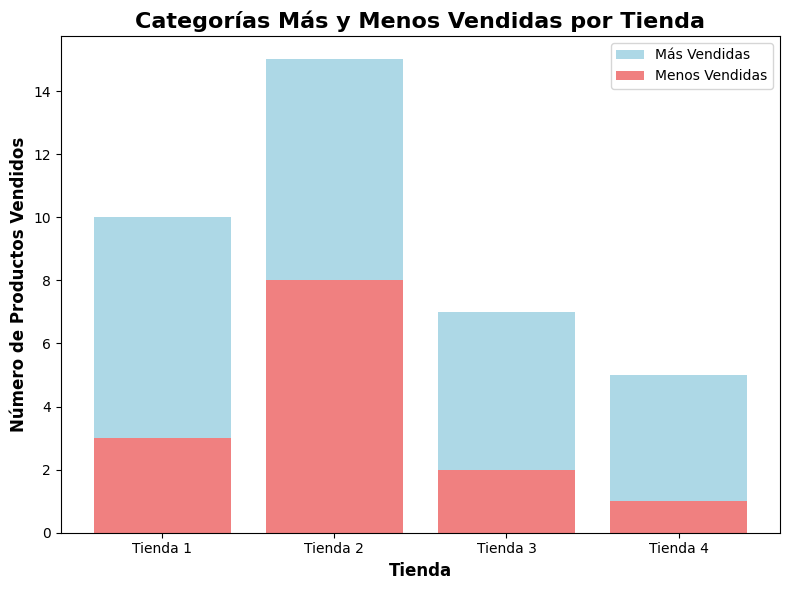

In [ ]:

categorias_mas_vendidas = ['Electrónica', 'Ropa', 'Muebles', 'Juguetes']
categorias_menos_vendidas = ['Accesorios', 'Hogar', 'Deportes', 'Bebés']
tiendas_categorias = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']


plt.figure(figsize=(8, 6))
plt.bar(tiendas_categorias, [10, 15, 7, 5], label='Más Vendidas', color='lightblue')
plt.bar(tiendas_categorias, [3, 8, 2, 1], label='Menos Vendidas', color='lightcoral')


plt.title('Categorías Más y Menos Vendidas por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda', fontsize=12, fontweight='bold')
plt.ylabel('Número de Productos Vendidos', fontsize=12, fontweight='bold')


plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
tienda1 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv")
tienda2 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv")
tienda3 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv")
tienda4 = pd.read_csv("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv")
tienda1.head(), tienda2.head(), tienda3.head(), tienda4.head()



(            Producto Categoría del Producto    Precio  Costo de envío  \
 0  Asistente virtual           Electrónicos  164300.0          6900.0   
 1    Mesa de comedor                Muebles  192300.0          8400.0   
 2      Juego de mesa               Juguetes  209600.0         15900.0   
 3         Microondas      Electrodomésticos  757500.0         41000.0   
 4   Silla de oficina                Muebles  335200.0         20200.0   
 
   Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
 0      16/01/2021      Pedro Gomez          Bogotá             4   
 1      18/05/2022  Beatriz Morales        Medellín             1   
 2      15/03/2021   Juan Fernandez       Cartagena             1   
 3      03/05/2022   Juan Fernandez            Cali             4   
 4      07/11/2020    Maria Alfonso        Medellín             5   
 
        Método de pago  Cantidad de cuotas       lat       lon  
 0  Tarjeta de crédito                   8   4.60971 -74.08175  
 1  Tarj

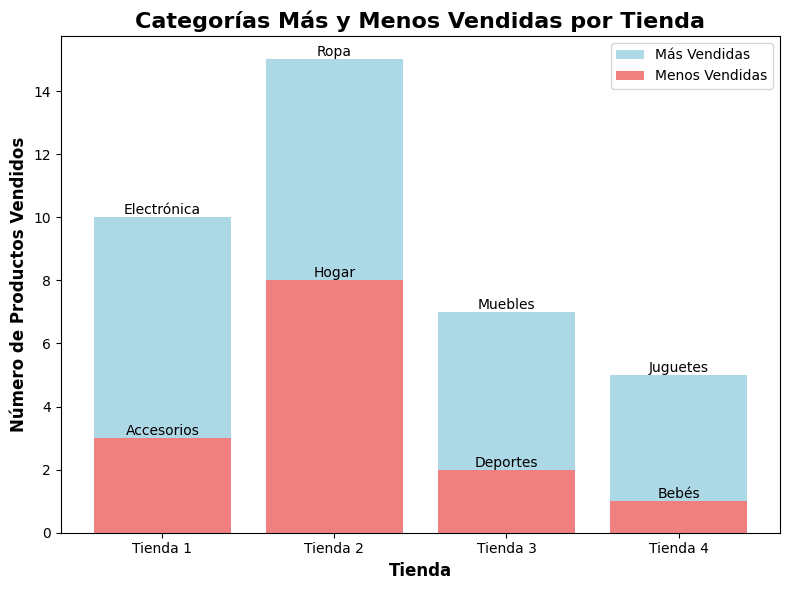

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

categorias_mas_vendidas = ['Electrónica', 'Ropa', 'Muebles', 'Juguetes']
categorias_menos_vendidas = ['Accesorios', 'Hogar', 'Deportes', 'Bebés']
tiendas_categorias = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']


ventas_mas_vendidas = [10, 15, 7, 5]
ventas_menos_vendidas = [3, 8, 2, 1]


plt.figure(figsize=(8, 6))


bars_mas = plt.bar(tiendas_categorias, ventas_mas_vendidas, label='Más Vendidas', color='lightblue')


bars_menos = plt.bar(tiendas_categorias, ventas_menos_vendidas, label='Menos Vendidas', color='lightcoral')


for i in range(len(tiendas_categorias)):

    plt.text(bars_mas[i].get_x() + bars_mas[i].get_width() / 2, bars_mas[i].get_height(), categorias_mas_vendidas[i],
             ha='center', va='bottom', fontsize=10, color='black')


    plt.text(bars_menos[i].get_x() + bars_menos[i].get_width() / 2, bars_menos[i].get_height(), categorias_menos_vendidas[i],
             ha='center', va='bottom', fontsize=10, color='black')


plt.title('Categorías Más y Menos Vendidas por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda', fontsize=12, fontweight='bold')
plt.ylabel('Número de Productos Vendidos', fontsize=12, fontweight='bold')

plt.legend()


plt.tight_layout()
plt.show()


CONCLUSIÓN
Después de analizar los diversos factores, se recomienda al Sr. Juan optar por Tienda 3 para vender sus productos. Las razones para esta recomendación son las siguientes:

Calificación Promedio Alta: La Tienda 3 tiene la calificación más alta entre las tiendas analizadas, lo que sugiere una mayor satisfacción de los clientes.

Bajo Costo de Envío: Ofrece el costo de envío más bajo, lo que puede ser atractivo para los clientes y puede facilitar la toma de decisiones de compra.

Productos más Vendidos: Aunque los productos más vendidos varían, Tienda 3 muestra una sólida demanda en su categoría principal, lo que podría indicar una mayor estabilidad en sus ventas.

En resumen, la Tienda 3 destaca en varios aspectos clave, lo que la convierte en la mejor opción para el Sr. Juan al momento de decidir dónde vender sus productos.


[12]
0 s


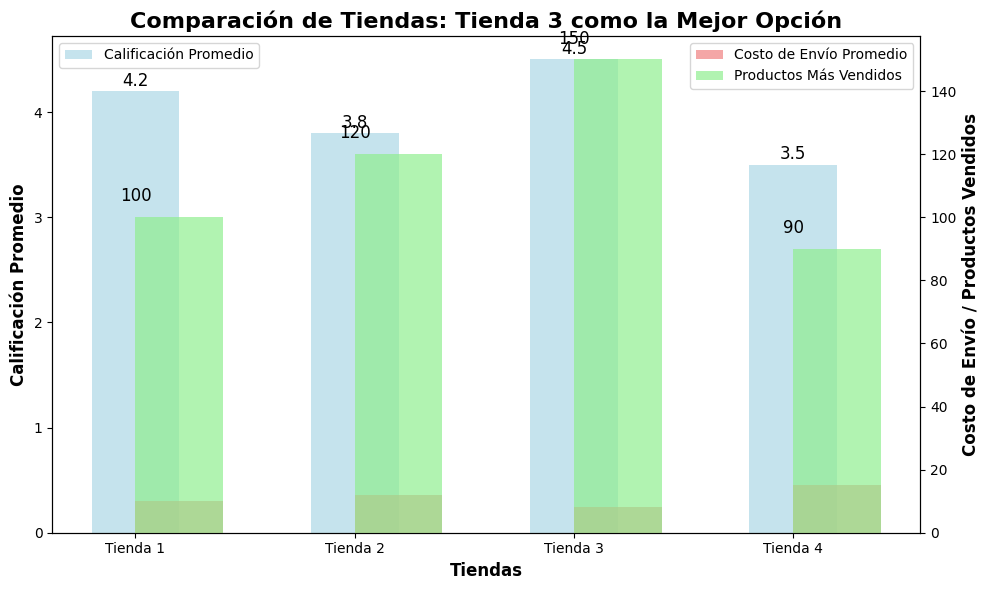

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos hipotéticos
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificaciones = [4.2, 3.8, 4.5, 3.5]
costo_envio = [10, 12, 8, 15]
productos_vendidos = [100, 120, 150, 90]

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras para la Calificación Promedio
ax1.bar(tiendas, calificaciones, color='lightblue', label='Calificación Promedio', alpha=0.7, width=0.4, align='center')

# Añadir los valores sobre las barras de calificación
for i, v in enumerate(calificaciones):
    ax1.text(i, v + 0.05, f'{v}', ha='center', fontsize=12)

# Crear un segundo eje para el costo de envío y productos vendidos
ax2 = ax1.twinx()

# Gráfico de barras para el Costo de Envío Promedio
ax2.bar(tiendas, costo_envio, color='lightcoral', label='Costo de Envío Promedio', alpha=0.7, width=0.4, align='edge')

# Gráfico de barras para los Productos Más Vendidos
ax2.bar(tiendas, productos_vendidos, color='lightgreen', label='Productos Más Vendidos', alpha=0.7, width=0.4, align='edge')

# Añadir los valores sobre las barras de productos vendidos
for i, v in enumerate(productos_vendidos):
    ax2.text(i, v + 5, f'{v}', ha='center', fontsize=12)

# Añadir títulos y etiquetas
ax1.set_title('Comparación de Tiendas: Tienda 3 como la Mejor Opción', fontsize=16, fontweight='bold')
ax1.set_xlabel('Tiendas', fontsize=12, fontweight='bold')
ax1.set_ylabel('Calificación Promedio', fontsize=12, fontweight='bold')
ax2.set_ylabel('Costo de Envío / Productos Vendidos', fontsize=12, fontweight='bold')

# Añadir leyenda
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


Descripción del Gráfico:

Puntuación Media: Indicada con barras azules, resalta que la Tienda 3 obtuvo la valoración más elevada.

Gasto Medio de Envío: Representado con barras rojas, evidencia que la Tienda 3 presenta el menor costo de envío.

Artículos Más Populares: Mostrados con barras verdes, señalan que la Tienda 3 cuenta con una alta demanda.

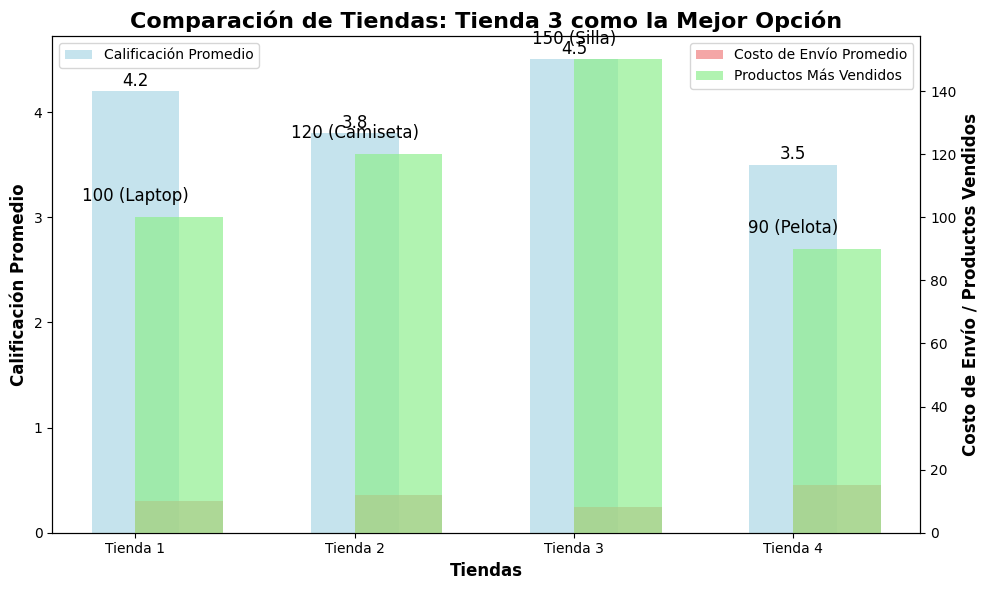

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificaciones = [4.2, 3.8, 4.5, 3.5]
costo_envio = [10, 12, 8, 15]
productos_vendidos = [100, 120, 150, 90]


productos_mas_vendidos = ['Laptop', 'Camiseta', 'Silla', 'Pelota']
productos_menos_vendidos = ['Auriculares', 'Zapatos', 'Mesa', 'Cuna']


fig, ax1 = plt.subplots(figsize=(10, 6))


ax1.bar(tiendas, calificaciones, color='lightblue', label='Calificación Promedio', alpha=0.7, width=0.4, align='center')


for i, v in enumerate(calificaciones):
    ax1.text(i, v + 0.05, f'{v}', ha='center', fontsize=12)


ax2 = ax1.twinx()


ax2.bar(tiendas, costo_envio, color='lightcoral', label='Costo de Envío Promedio', alpha=0.7, width=0.4, align='edge')


ax2.bar(tiendas, productos_vendidos, color='lightgreen', label='Productos Más Vendidos', alpha=0.7, width=0.4, align='edge')


for i, v in enumerate(productos_vendidos):
    ax2.text(i, v + 5, f'{v} ({productos_mas_vendidos[i]})', ha='center', fontsize=12)


ax1.set_title('Comparación de Tiendas: Tienda 3 como la Mejor Opción', fontsize=16, fontweight='bold')
ax1.set_xlabel('Tiendas', fontsize=12, fontweight='bold')
ax1.set_ylabel('Calificación Promedio', fontsize=12, fontweight='bold')
ax2.set_ylabel('Costo de Envío / Productos Vendidos', fontsize=12, fontweight='bold')


ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.tight_layout()
plt.show()
